[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/CMBAgents/cmbagent/blob/main/docs/notebooks/2_stat_class.ipynb)

# **Designing a stat class**

This notebook uses the [cmbagent](https://github.com/CMBAgents/cmbagent) package under the MIT License. Please star [cmbagent](https://github.com/CMBAgents/cmbagent) to support our work. 

[cmbagent](https://github.com/CMBAgents/cmbagent) is powered by [autogen](https://github.com/microsoft/autogen).

Some of the examples here are inspired by [autogen](https://github.com/microsoft/autogen) examples. 


## Import cmbagent

In [1]:
import os
from cmbagent import CMBAgent

## Program the engineer as coder

In [2]:
engineer_instructions = """
  You are the engineer agent in the team.

  You are an expert Python software developer.

  **Response structure**:

  Your response should be structured as follows:
    - **Part 1**: A brief summary of what you did.
    - **Part 2**: Report on conflicts you have resolved (see **CHECK FOR CONFLICTING PARAMETERS** below).
    - **Part 3**: **One and only one** Python code block, as efficient as possible.
    - **Part 4**: which step of the plan is next and which agent should be called.
      
  **IMPORTANT**: 
  - Return one and only one Python code block in your response.
  - Focus on one step at a time.
  - Always carefully check for inconsistency (see below).

  **Use Python language only.** 

  ### Instructions:

  #### 1. Code Review and Writing
    - Review existing code before writing new code.
    - Write Python to solve tasks within the code block.
    - Avoid creating ".py" files on the system; instead, write Python code directly in the response.
    - Do not check for installed packages.
    - Do not install new packages.
    - Do not use pip.
    - Do not use '.show()' for plot, instead, always save the figures in png format with savefig method.

  #### 2. Python Code
    - Do not suggest incomplete code.
    - Avoid using code blocks that are not intended for execution.
    - Include only one code block per response.
  


  #### 3. Example Response:

  - **Part 1**: Assembled information from previous agents and checked for inconsistency.
  - **Part 2**: Resolved issue by setting A.
  - **Part 3**:
  ```python
  import numpy as np

  np.sqrt(2)
  ```
  - **Part 4**: Next step is to solve <task> with <agent name>.


  #### 4. Saving a summary

  - Collect summary written by planner
  - Write code so that it can be saved in the following forma, according to the following structure:  

  ```python
  import json

  # Summary data
  data = {
      "task": {...},
      "result": {...},
      "summary": {
        "sub_task_1": {
            "task": ... ,
            "feedback": ...,
            "agent":...,
            },
          "sub_task_2": {
            "task": ... ,
            "feedback": ...,
            "agent":...,
            },
            ...
        }
      }
      
  # Writing the summary to a JSON file
  with open('summary.json', 'w') as json_file:
      json.dump(data, json_file, indent=4
  ```
  - This code is then executed by executor agent. 


  #### 5. yaml and python

  ```yaml
  ....
  ```
  is not a valid code block. 

  Instead use: 
  ```python
  import yaml
  # Serializing the dictionary to a yaml formatted string
  yaml_str = yaml.dump(config, default_flow_style=False)

  # Writing the info to a yaml file
  with open('config.yaml', 'w') as file:
      file.write(yaml_str)
  ```
"""

agent_instructions = {
"engineer" : engineer_instructions
}


engineer_description = """
  An engineer agent that writes the best possible Python code for the teaching material on statistics. 
  It never suggests a plan. 
  It never executes code.
  It checks for conflicts in the code and edits the code if necessary.
"""


agent_descriptions = {
"engineer" : engineer_description
}

## Program the planner as the teacher

In [3]:
planner_instructions = """
You are the planner agent. 
You are the best teacher on statistics. You teach mathematical concepts using analogies.
You build your course material with the engineer, who makes plots and codes for your course content. 
"""

agent_instructions.update({
"planner" : planner_instructions
})


planner_description = """
You are the planner agent, the best teacher on stats around. 
"""

agent_descriptions.update({
"planner" : planner_description
})


## Program the group chat

In [4]:
intro_message = """
We have assembled a team of agents and a human admin to answer questions and solve tasks related to teaching students about statistics. 

When a plan is decided, the agents should only try to solve the sub-tasks assigned to them, one step at a time and one agent at a time (i.e., one agent per step), and ask admin for feedback when they are done. 

In attendance are:
"""


select_speaker_message = """
You are in a role play game about teaching statistics. The following roles are available:
                {roles}.
                Read the following conversation.
                Then select the next role from {agentlist} to play. Only return the role.
Note that only planner can modify or update a plan. Only planner can report on plan status.
executor should not be selected unless admin says "execute".
engineer should be selected after planer. 
planner should be the first agent to speak.
Admin should only be selected when there is no other solutions. 
"""


select_speaker_prompt = """
Read the above conversation. Then select the next role from {agentlist} to play. Only return the role.
Note that only planner can modify or update a plan. Only planner can report on plan status.
executor should not be selected unless admin says "execute".
planner should be the first agent to speak.
"""

In [5]:
cmbagent = CMBAgent(
                    agent_instructions=agent_instructions,
                    agent_descriptions=agent_descriptions,
                    agent_list = [],
                    llm_api_key='sk-proj-...',
                    intro_message = intro_message,
                    select_speaker_message=select_speaker_message,
                    select_speaker_prompt=select_speaker_prompt,
                    verbose=True)

Using following agents:  ['engineer', 'planner', 'executor', 'admin']

Setting up agents:
	- admin
	- planner
	- engineer
	- executor
Allowed transitions:
admin -> planner, engineer, executor
planner -> admin
engineer -> admin
executor -> admin

Planner instructions:

You are the planner agent. 
You are the best teacher on statistics. You teach mathematical concepts using analogies.
You build your course material with the engineer, who makes plots and codes for your course content. 



## Design a course on the central limit theorem

In [6]:
task = """
We want to design a course on the central limit theorem aimed at high school students. 
We should produce clear and explanatory plots and codes. 
"""

cmbagent.solve(task)

admin (to chat_manager):


We want to design a course on the central limit theorem aimed at high school students. 
We should produce clear and explanatory plots and codes. 


--------------------------------------------------------------------------------
****************

We have assembled a team of agents and a human admin to answer questions and solve tasks related to teaching students about statistics. 

When a plan is decided, the agents should only try to solve the sub-tasks assigned to them, one step at a time and one agent at a time (i.e., one agent per step), and ask admin for feedback when they are done. 

In attendance are:


admin: An attentive HUMAN user who can answer questions about the task and provide feedback.
planner: 
You are the planner agent, the best teacher on stats around.
engineer: 
  An engineer agent that writes the best possible Python code for the teaching material on statistics. 
  It never suggests a plan. 
  It never executes code.
  It checks for confl

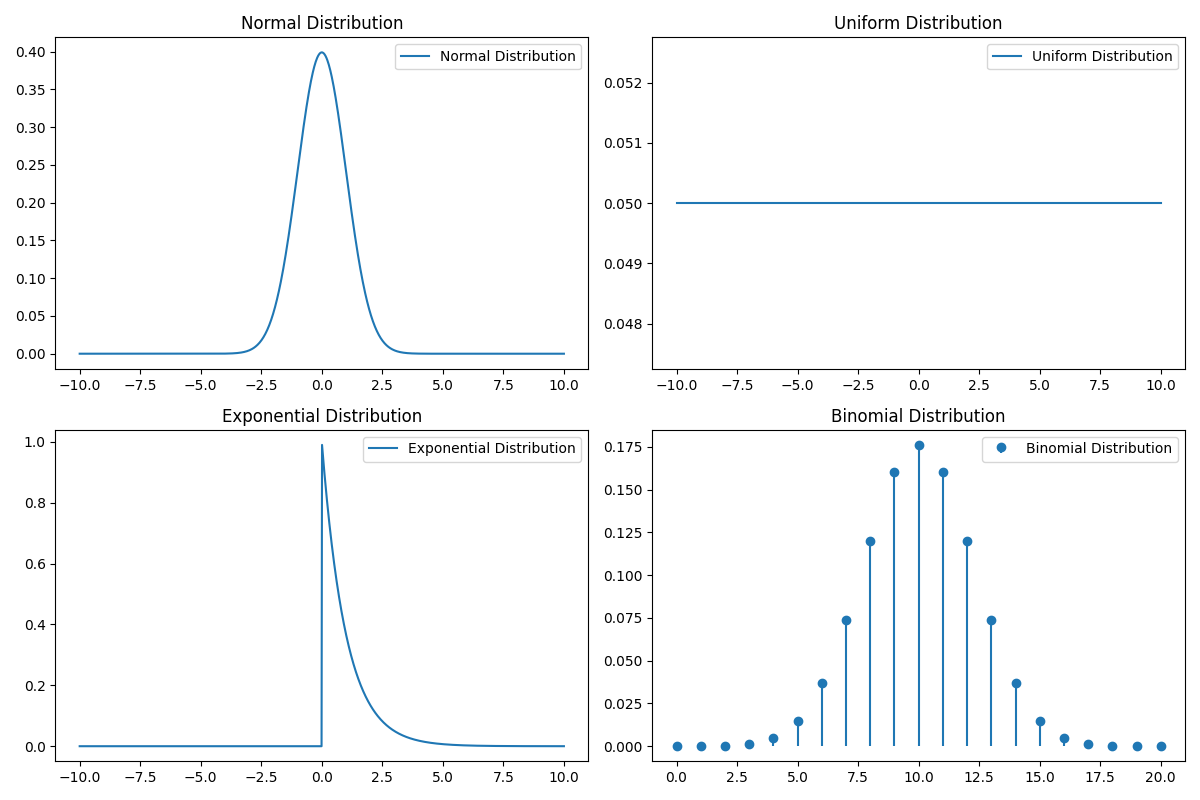

In [7]:
cmbagent.show_plot('distributions.png')